In [ ]:
!pip install kaggle

In [12]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r')as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [15]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


importing dependencies

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 #image processing library
from google.colab.patches import cv2_imshow #to display the image in new window
from PIL import Image #image processing library to read image
from sklearn.model_selection import train_test_split


In [17]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])  # first 5 files in the with_mask directory

['with_mask_1894.jpg', 'with_mask_631.jpg', 'with_mask_218.jpg', 'with_mask_2634.jpg', 'with_mask_696.jpg']


In [18]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_2943.jpg', 'without_mask_919.jpg', 'without_mask_2695.jpg', 'without_mask_1026.jpg', 'without_mask_1169.jpg']


In [19]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**creating labels for two class of images**


with mask -1
without mask -0

In [20]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [21]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels)

7553
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

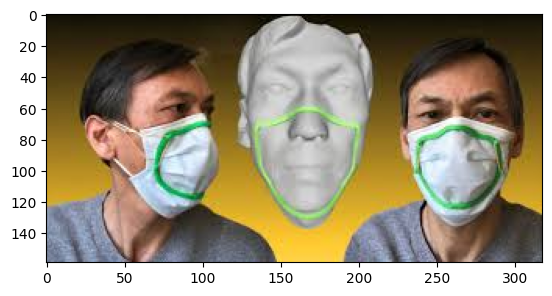

In [22]:
#imread(image file name)-->A NumPy array is produced after reading an image file with the cv2.imread() method.
img=mpimg.imread('/content/data/with_mask/with_mask_2586.jpg')
implot=plt.imshow(img)
plt.show()

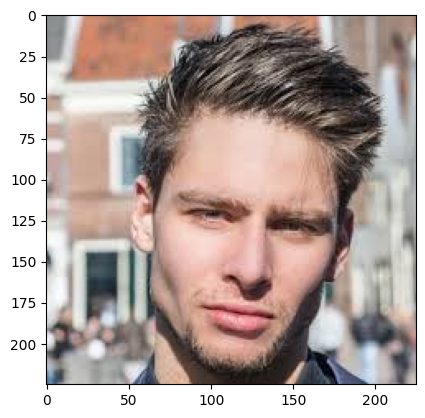

In [23]:
img=mpimg.imread('/content/data/without_mask/without_mask_3131.jpg')
implot=plt.imshow(img)
plt.show()

**Image Processing**

(1)Resize the Images

(2)Convert the images to numpy arrays

In [24]:
with_mask_path='/content/data/with_mask/'
data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path +img_file)  #read all the images in the with_mask_files
  image=image.resize((128,128))  #resize the images
  image=image.convert('RGB')#convert black and white images into coloured images
  image=np.array(image)
  data.append(image)
print(image)
print(data)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[[[67 51 51]
  [67 51 51]
  [68 52 52]
  ...
  [67 44 36]
  [68 45 37]
  [68 45 37]]

 [[65 49 49]
  [68 52 52]
  [74 58 58]
  ...
  [66 43 36]
  [67 44 37]
  [68 45 37]]

 [[64 48 48]
  [70 54 54]
  [82 65 65]
  ...
  [66 43 35]
  [67 44 36]
  [68 45 37]]

 ...

 [[49 30 26]
  [49 31 27]
  [51 32 28]
  ...
  [72 55 52]
  [79 64 61]
  [82 68 65]]

 [[60 41 37]
  [61 42 38]
  [60 41 37]
  ...
  [68 51 49]
  [74 58 56]
  [76 62 59]]

 [[70 51 47]
  [70 51 47]
  [68 49 45]
  ...
  [66 49 47]
  [65 49 47]
  [65 50 47]]]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:
  image=Image.open(without_mask_path +img_file)  #read all the images in the with_mask_files
  image=image.resize((128,128))  #resize the images
  image=image.convert('RGB')#convert black and white images into coloured images
  image=np.array(image)
  data.append(image)
print(image)
print(data)

[[[157  60  25]
  [157  60  24]
  [157  61  23]
  ...
  [247 224 161]
  [240 227 165]
  [235 227 164]]

 [[157  61  24]
  [157  61  23]
  [157  61  22]
  ...
  [236 217 148]
  [244 222 159]
  [240 223 162]]

 [[157  59  27]
  [157  59  25]
  [157  59  25]
  ...
  [236 222 142]
  [236 223 149]
  [239 227 162]]

 ...

 [[ 46  47  49]
  [ 46  47  49]
  [ 46  47  49]
  ...
  [207 150 102]
  [204 147  99]
  [202 144  96]]

 [[ 46  47  49]
  [ 45  46  48]
  [ 44  45  47]
  ...
  [205 148  99]
  [204 149  99]
  [204 149 100]]

 [[ 46  47  49]
  [ 47  48  50]
  [ 47  48  50]
  ...
  [204 146  98]
  [203 148  99]
  [204 149  99]]]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
len(data)

7553

In [27]:
data[0]

array([[[246, 246, 246],
        [249, 249, 249],
        [248, 248, 248],
        ...,
        [246, 247, 245],
        [243, 244, 245],
        [246, 248, 249]],

       [[248, 248, 248],
        [240, 240, 240],
        [243, 243, 243],
        ...,
        [246, 245, 244],
        [242, 240, 241],
        [247, 245, 247]],

       [[248, 248, 248],
        [244, 244, 244],
        [246, 246, 246],
        ...,
        [244, 243, 244],
        [245, 243, 244],
        [249, 246, 247]],

       ...,

       [[246, 244, 248],
        [245, 244, 246],
        [242, 243, 244],
        ...,
        [100, 100,  95],
        [ 94,  97,  90],
        [ 98, 103,  95]],

       [[244, 239, 244],
        [239, 236, 239],
        [244, 243, 244],
        ...,
        [217, 211, 212],
        [217, 212, 214],
        [217, 214, 214]],

       [[240, 241, 244],
        [244, 241, 244],
        [241, 242, 244],
        ...,
        [251, 243, 245],
        [252, 245, 250],
        [251, 245, 251]]

In [28]:
type(data[0])

numpy.ndarray

In [29]:
data[0].shape

(128, 128, 3)

In [30]:
#convert imagelist (data) and label list into numpy array
X=np.array(data)
Y=np.array(labels)

In [31]:
X.shape  #(len(X),height of array,width of array,rgb values)

(7553, 128, 128, 3)

In [32]:
Y.shape

(7553,)

**Train_test_split**

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)



In [34]:
X_train.shape

(6042, 128, 128, 3)

In [35]:
X_test.shape

(1511, 128, 128, 3)

In [36]:
#scaling the data  -->to improve the performance
# all features are on a comparable scale and have comparable ranges
#scale --> 0(black) to 1(white)
X_train_scaled_v=X_train/255
X_test_scaled_v=X_test/255

In [38]:
X_train_scaled_v[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.19607843, 0.19215686, 0.21568627],
        [0.18823529, 0.18431373, 0.20784314],
        [0.17254902, 0

**building convolutional neural network **

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

In [ ]:
numclasses=2
model=keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),   #convert into single dimension

    layers.Dense(128,activation='relu'),
    #dropout layer-->to prevent overfitting. individual nodes are excluded in various training runs using a probability
    layers.Dropout(0.5),


    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),



    #output layer
    layers.Dense(numclasses,activation='sigmoid')



])

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
history=model.fit(X_train_scaled_v,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 25ms/step - loss: 0.5064 - accuracy: 0.7848 - val_loss: 0.3669 - val_accuracy: 0.8529
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2971 - accuracy: 0.8862 - val_loss: 0.2628 - val_accuracy: 0.8926
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2584 - accuracy: 0.8959 - val_loss: 0.2496 - val_accuracy: 0.9041
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2126 - accuracy: 0.9178 - val_loss: 0.2399 - val_accuracy: 0.9008
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1879 - accuracy: 0.9285 - val_loss: 0.2208 - val_accuracy: 0.9124


**model Evaluation**

In [43]:
loss,accuracy=model.evaluate(X_test_scaled_v,Y_test)
print('test accuracy',accuracy)

48/48 [==============================] - 1s 12ms/step - loss: 0.2414 - accuracy: 0.9093
test accuracy 0.9093315601348877


In [44]:
print(loss)

0.24140173196792603


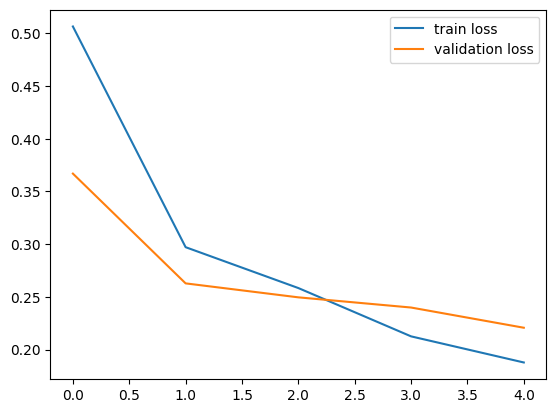

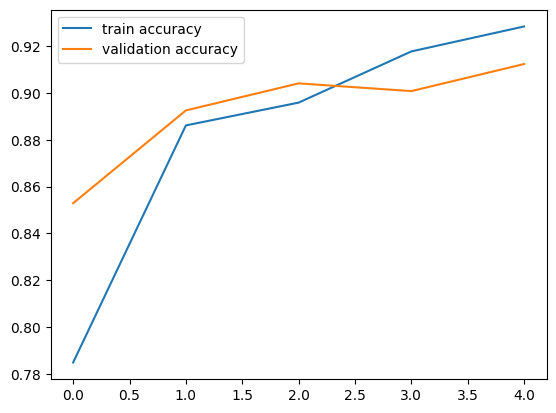

In [45]:
h=history
#plot loss
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


#plot accuracy
plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/with mask.webp


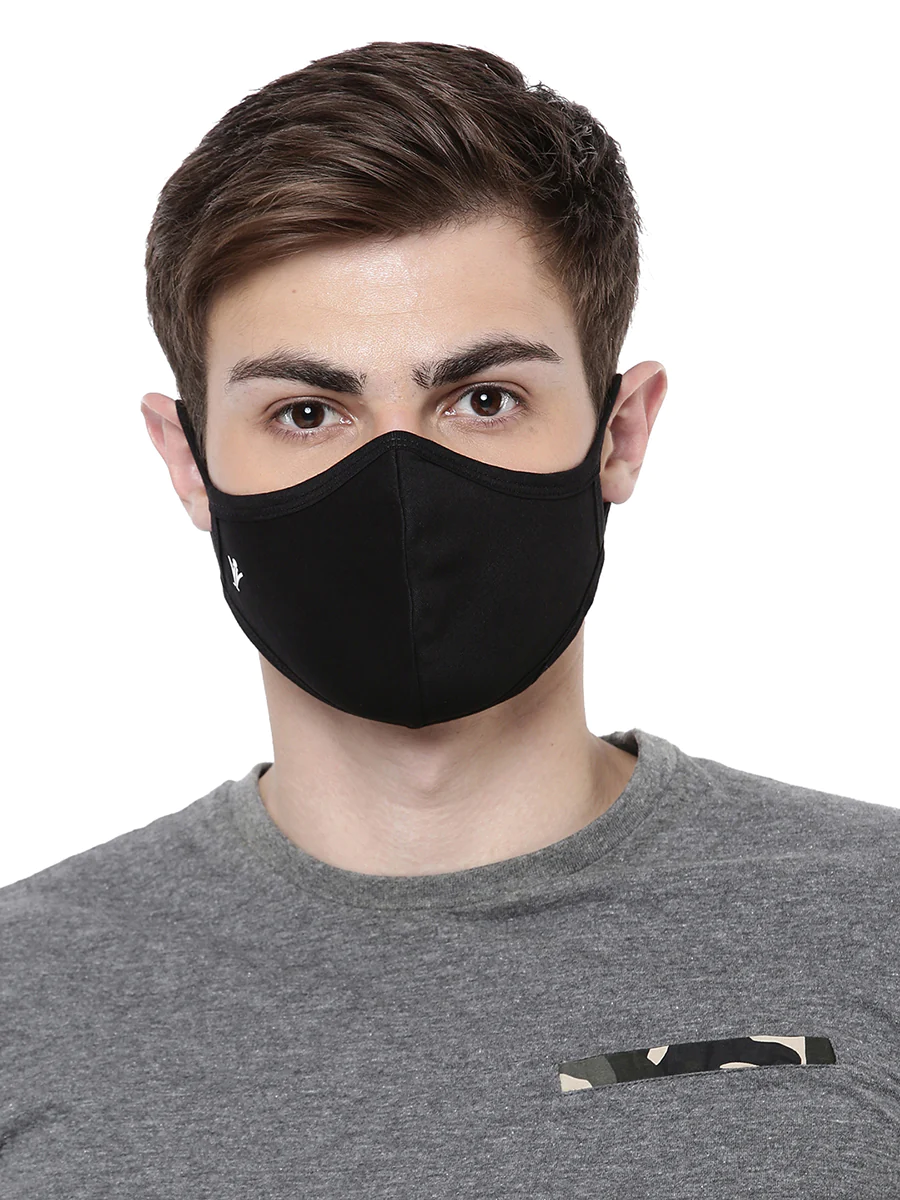

1/1 [==============================] - 0s 45ms/step
[[0.16790003 0.7397595 ]]
1
The person in the image is wearing a mask


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])  # 1 refers to predicting 1 image

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')